# Text Classification system



### Importing packages and data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re,string
from nltk.stem import PorterStemmer
nltk.download('stopwords')
from sklearn.model_selection import train_test_split


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aayush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv("bbc-text.csv")
df = df.sample(frac = 1)
df

,category,text
887,politics,minister defends hunting ban law the law banni...
355,business,eu too slow on economic reforms most eu coun...
852,entertainment,prince crowned top music earner prince earne...
8,sport,wilkinson fit to face edinburgh england captai...
421,sport,spurs to sign iceland u21 star tottenham are p...
...,...,...
1211,business,qatar and shell in $6bn gas deal shell has sig...
1281,sport,hewitt falls to dent lleyton hewitt suffered a...
310,politics,mps issued with blackberry threat mps will be ...
1278,entertainment,downloads enter us singles chart digital music...


In [3]:
df = df[(df['category'] == "tech") | (df['category'] == "entertainment") | (df['category'] == "business")]
df

,category,text
355,business,eu too slow on economic reforms most eu coun...
852,entertainment,prince crowned top music earner prince earne...
990,business,us in eu tariff chaos trade row the us has ask...
1755,tech,2d metal slug offers retro fun like some drill...
1123,business,qantas sees profits fly to record australian a...
...,...,...
159,business,orange colour clash set for court a row over t...
1679,tech,security warning over fbi virus the us feder...
1211,business,qatar and shell in $6bn gas deal shell has sig...
1278,entertainment,downloads enter us singles chart digital music...


In [4]:
df.shape


(1297, 2)

### EDA

In [5]:
#Categories
no_of_classes = set(df['category'])
no_of_classes

{'business', 'entertainment', 'tech'}

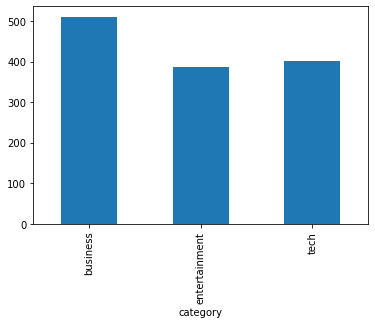

In [6]:
#Distribution of Categories
df.groupby('category').text.count().plot.bar()
plt.show()

# Basic preprocessing


### Stopwords removal

In [7]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [8]:
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


C:\Users\Aayush\AppData\Local\Temp\ipykernel_14548\2657773245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


In [9]:
print(df['text'])

355     eu slow economic reforms eu countries failed p...
852     prince crowned top music earner prince earned ...
990     us eu tariff chaos trade row us asked world tr...
1755    2d metal slug offers retro fun like drill serg...
1123    qantas sees profits fly record australian airl...
                              ...                        
159     orange colour clash set court row colour orang...
1679    security warning fbi virus us federal bureau i...
1211    qatar shell $6bn gas deal shell signed $6bn (£...
1278    downloads enter us singles chart digital music...
1483    oasis star fined german brawl oasis singer lia...
Name: text, Length: 1297, dtype: object


## Porter Stemming


In [10]:
ps = PorterStemmer()

In [11]:
df['text'] = df['text'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))


C:\Users\Aayush\AppData\Local\Temp\ipykernel_14548\2478782523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))


In [12]:
print(df['text'])

355     eu slow econom reform eu countri fail put plac...
852     princ crown top music earner princ earn pop st...
990     us eu tariff chao trade row us ask world trade...
1755    2d metal slug offer retro fun like drill serge...
1123    qanta see profit fli record australian airlin ...
                              ...                        
159     orang colour clash set court row colour orang ...
1679    secur warn fbi viru us feder bureau investig w...
1211    qatar shell $6bn ga deal shell sign $6bn (£3.1...
1278    download enter us singl chart digit music down...
1483    oasi star fine german brawl oasi singer liam g...
Name: text, Length: 1297, dtype: object


### Converting to lowercase


In [13]:
df['text'] = df['text'].apply(lambda x: ' '.join(x.lower() for x in x.split()))


C:\Users\Aayush\AppData\Local\Temp\ipykernel_14548\1754837953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: ' '.join(x.lower() for x in x.split()))


In [14]:
df['text'][0]


'tv futur hand viewer home theatr system plasma high-definit tv digit video record move live room way peopl watch tv radic differ five year time. accord expert panel gather annual consum electron show la vega discuss new technolog impact one favourit pastimes. us lead trend programm content deliv viewer via home network cabl satellit telecom compani broadband servic provid front room portabl devices. one talked-about technolog ce digit person video record (dvr pvr). set-top box like us tivo uk sky+ system allow peopl record store play paus forward wind tv programm want. essenti technolog allow much personalis tv. also built-in high-definit tv set big busi japan us slower take europ lack high-definit programming. peopl forward wind advert also forget abid network channel schedul put togeth a-la-cart entertainment. us network cabl satellit compani worri mean term advertis revenu well brand ident viewer loyalti channels. although us lead technolog moment also concern rais europ particular

### Removing Punctuation


In [15]:
df['cleaned'] = df['text'].str.replace('[^\w\s]','')


C:\Users\Aayush\AppData\Local\Temp\ipykernel_14548\2934117381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned'] = df['text'].str.replace('[^\w\s]','')


In [16]:
df['text'][0]


'tv futur hand viewer home theatr system plasma high-definit tv digit video record move live room way peopl watch tv radic differ five year time. accord expert panel gather annual consum electron show la vega discuss new technolog impact one favourit pastimes. us lead trend programm content deliv viewer via home network cabl satellit telecom compani broadband servic provid front room portabl devices. one talked-about technolog ce digit person video record (dvr pvr). set-top box like us tivo uk sky+ system allow peopl record store play paus forward wind tv programm want. essenti technolog allow much personalis tv. also built-in high-definit tv set big busi japan us slower take europ lack high-definit programming. peopl forward wind advert also forget abid network channel schedul put togeth a-la-cart entertainment. us network cabl satellit compani worri mean term advertis revenu well brand ident viewer loyalti channels. although us lead technolog moment also concern rais europ particular

In [17]:
df

,category,text,cleaned
355,business,eu slow econom reform eu countri fail put plac...,eu slow econom reform eu countri fail put plac...
852,entertainment,princ crown top music earner princ earn pop st...,princ crown top music earner princ earn pop st...
990,business,us eu tariff chao trade row us ask world trade...,us eu tariff chao trade row us ask world trade...
1755,tech,2d metal slug offer retro fun like drill serge...,2d metal slug offer retro fun like drill serge...
1123,business,qanta see profit fli record australian airlin ...,qanta see profit fli record australian airlin ...
...,...,...,...
159,business,orang colour clash set court row colour orang ...,orang colour clash set court row colour orang ...
1679,tech,secur warn fbi viru us feder bureau investig w...,secur warn fbi viru us feder bureau investig w...
1211,business,qatar shell $6bn ga deal shell sign $6bn (£3.1...,qatar shell $6bn ga deal shell sign $6bn (£3.1...
1278,entertainment,download enter us singl chart digit music down...,download enter us singl chart digit music down...


### Word Cloud by Category

In [18]:
tech = ' '.join(list(df.text[df.category == 'tech']))
business = ' '.join(list(df.text[df.category == 'business']))
entertainment = ' '.join(list(df.text[df.category == 'entertainment']))

In [19]:
from wordcloud import WordCloud

def wordcloud(text, title):
    wordcloud = WordCloud(
        width = 800,
        height = 400,
        background_color = "black",
        stopwords = stop_words,
        min_font_size = 10
    ).generate(text)

    plt.figure(figsize = (16, 10), facecolor = None) 
    plt.imshow(wordcloud)
    plt.title("Word Cloud for " + title + " Articles\n", fontsize = 20)
    plt.axis("off")
    plt.show()



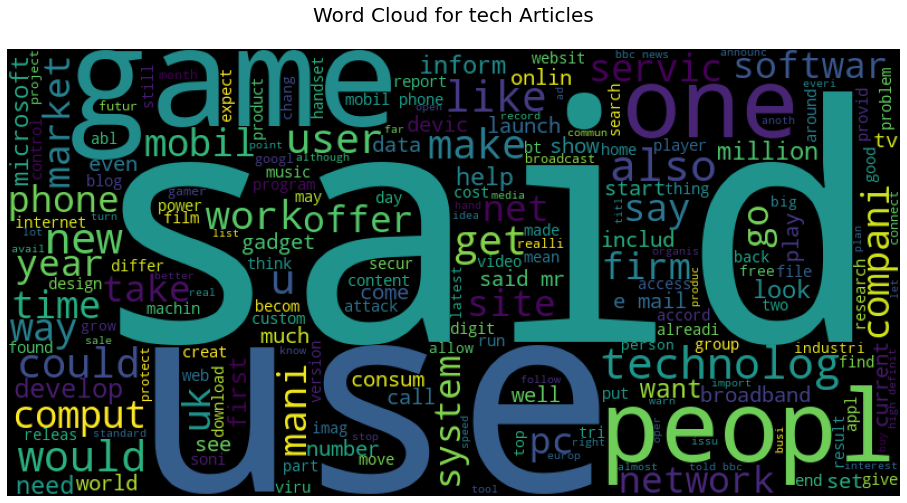

In [20]:
wordcloud(tech, "tech")

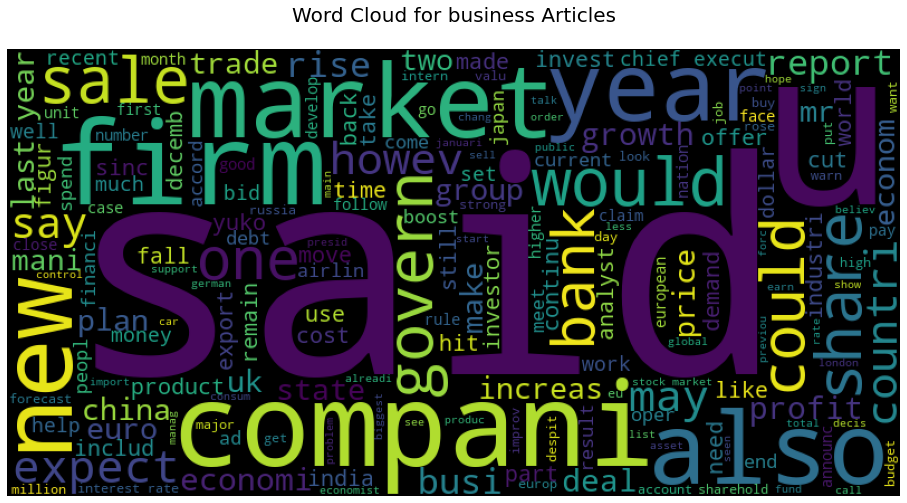

In [21]:
wordcloud(business, "business")

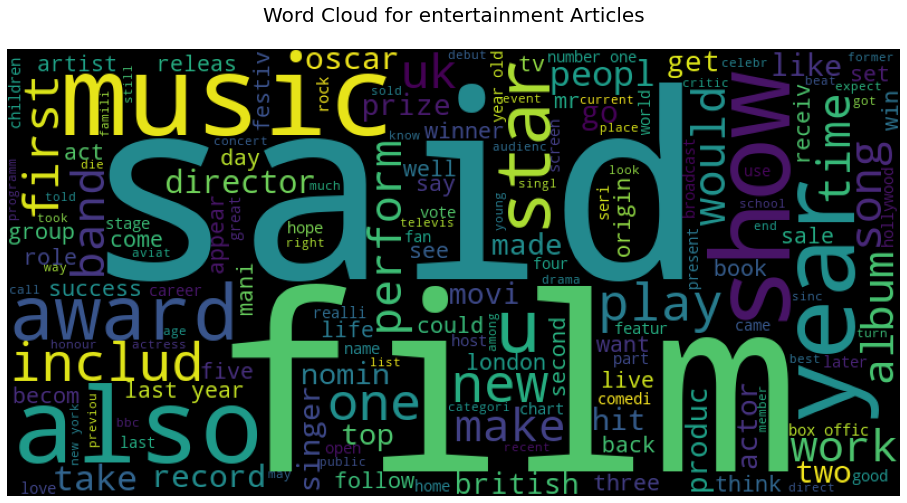

In [22]:
wordcloud(entertainment, "entertainment")


### Feature Engineering

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(sublinear_tf=True, max_features=250,min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))

features = tf_idf.fit_transform(df.cleaned).toarray()
features.shape

(1297, 250)

In [24]:
features

array([[0.        , 0.        , 0.        , ..., 0.1704232 , 0.08099326,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.0968641 , 0.        ,
        0.10503881],
       [0.        , 0.        , 0.        , ..., 0.10496049, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.22086988],
       [0.1199083 , 0.07643542, 0.        , ..., 0.        , 0.        ,
        0.09012971],
       [0.30566421, 0.        , 0.        , ..., 0.        , 0.        ,
        0.08832703]])

## Model training

### Splitting dataset

In [25]:
X = df['cleaned']
Y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=101)

### Feature Generation

In [26]:
tfidf_vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", norm='l2')


### Applying Algorithms

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

NB = MultinomialNB()

In [28]:
# Pipeline for Naive Bays Classifier
NB_pipeline = Pipeline([('tfidf', tfidf_vectorizer),
               ('clf', MultinomialNB()),
              ])

In [29]:
###Training Models
NB_model = NB_pipeline.fit(X_train, y_train)


### Model Selection

In [30]:
from sklearn.metrics import accuracy_score

#Accuracy score of Naive Bays Classifier
NB_predict = NB_model.predict(X_test)
print("NB Test accuracy = ",accuracy_score(y_test,NB_predict))
print('\n')


NB Test accuracy =  0.9743589743589743




               precision    recall  f1-score   support

     business       0.99      0.99      0.99       152
entertainment       1.00      0.95      0.97       128
         tech       0.93      0.99      0.96       110

     accuracy                           0.97       390
    macro avg       0.97      0.97      0.97       390
 weighted avg       0.98      0.97      0.97       390



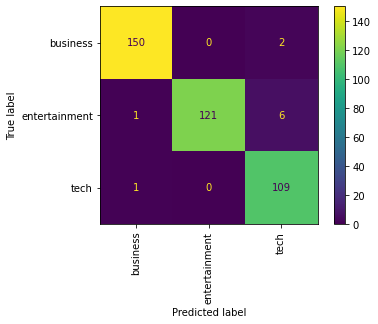

<Figure size 7200x288 with 0 Axes>

In [31]:
from sklearn import metrics
from matplotlib.pyplot import xticks
from matplotlib.pyplot import yticks
ytest = np.array(y_test)

# Confussion Matrix and confussion report of Naive Bays Classifier
print(classification_report(ytest, NB_model.predict(X_test)))
confusion_matrix = metrics.confusion_matrix(ytest, NB_model.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["business","entertainment","tech"])


cm_display.plot()
xticks(rotation = 90)
yticks(rotation = 0)
plt.figure().set_figwidth(100)

plt.show()

## Testing with  dataset

In [34]:
real_news = input("Enter any news = ")
realtime_news = pd.DataFrame({'real_news':[real_news]})

#Prediction and Accuracy
from sklearn.metrics import accuracy_score
predict_NB = NB_model.predict(realtime_news['real_news'])

print('\n')
print("Prediction using NB",predict_NB[0])



Enter any news = The government has stepped back from the decision to host the International Indian Film Academy (IIFA) Awards in Kathmandu. Deepak Raj Joshi, Chief Executive Officer (CEO) of the Nepal Tourism Board (NTB) that has been handed responsibility to coordinate the hosting of event, told Setopati that it has decided to immediately stop all preparations. The International Relations Committee of the parliament has already instructed the government to not host the event. CEO Joshi said preparations will be stopped due to that instruction and in respect of public sentiments. "We had taken the event as an opportunity for tourism promotion and branding. But we have decided to stop it feeling it is not the appropriate time to host the event due to the instruction of parliamentary committee and other political and social reasons," he added. Minister for Communication and Information Technology Gokul Baskota during the weekly press conference on Thursday had said the event will be hos